# Projekt Eksploracji Danych Youtube Trending

## Import bibliotek

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # To plot dates on histograms' axis
import itertools
from collections import Counter
from wordcloud import WordCloud
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [41]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot')

## Wczytanie danych

In [42]:
data_gb = pd.read_csv("./youtube_data/GB_videos_5p.csv", sep=";")
data_us = pd.read_csv("./youtube_data/US_videos_5p.csv", sep=";")
data = pd.concat([data_gb, data_us])

In [43]:
data.shape

(79816, 16)

≈ÅƒÖcznie, dane z obu plik√≥w zawierajƒÖ 79816 wierszy, z kt√≥rych ka≈ºdy opisany jest za pomocƒÖ nastƒôpujƒÖcych atrybut√≥w:

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79816 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  79816 non-null object
trending_date             79816 non-null object
title                     79816 non-null object
channel_title             79816 non-null object
category_id               3930 non-null float64
publish_time              79816 non-null object
tags                      79816 non-null object
views                     79816 non-null int64
likes                     79816 non-null int64
dislikes                  79816 non-null int64
comment_count             79816 non-null int64
thumbnail_link            79816 non-null object
comments_disabled         79816 non-null bool
ratings_disabled          79816 non-null bool
video_error_or_removed    79816 non-null bool
description               78634 non-null object
dtypes: bool(3), float64(1), int64(4), object(8)
memory usage: 8.8+ MB


Przyk≈Çadowe dane:

In [45]:
data.head()

video_id trending_date  \
0  Jw1Y-zhQURU      17.14.11   
1  3s1rvMFUweQ      17.14.11   
2  n1WpP7iowLc      17.14.11   
3  PUTEiSjKwJU      17.14.11   
4  rHwDegptbI4      17.14.11   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: ‚Ä¶Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyonc√©   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis          NaN  2017-11-10T07:38:29.000Z   
1         Saturday Night Live          NaN  2017-11-12T06:24:44.000Z   
2                  EminemVEVO          NaN  2017-11-10T17:00:03.000Z   
3  Salford City Football Club          NaN  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos          NaN  2017-11-13T01:45:13.000Z   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                        description   
0  Click here to continue the story and make your...  
1  Musical guest Taylor Swift performs ‚Ä¶Ready for...  
2  Eminem's new track Walk on Water ft. Beyonc√© i...  
3  Salford drew 4-4 against the Class of 92 and F...  
4  Dashcam captures truck's near miss with child ...

## Analiza atrybut√≥w

### video_id

In [46]:
data.video_id.value_counts()

#NAZWA?        725
8h--kFui1JA     65
vjSohj-Iclc     62
VYOjWnS4cMY     61
l884wKofd54     60
zxwfDlhJIpw     59
UUkn-enk2RU     59
BspHjvU11y4     59
5GHXEGz3PJg     59
CX11yw6YL1w     57
vjI4Alon-3Q     56
oWw1BcFhk-k     56
tJfDBSWYqU8     56
u_C4onVrr8U     55
mdWcaWBxxcY     55
ffxKSjUwKdU     55
KUUjtUP2CrE     55
i5qOzqD9Rms     55
6SuMbFuKDf8     54
pFc6I0rgmgY     54
rxmtHVSVjdo     54
iWZmdoY1aTE     53
T4FAg5A4wQk     53
M4ZoCHID9GI     52
OAGfx7eB3gA     52
DdLYSziSXII     52
tjA7nAHOAww     52
pcJo0tIWybY     51
NukmFF__G-g     51
Wpm07-BGJnE     51
              ... 
eYf1IKFNHgM      1
uzK1OmxS4CE      1
aydY1eiGjgs      1
qaSOyhK3gTM      1
bhoFXkVy8JA      1
uT3wso5Zp7k      1
N-3NfWJHNhg      1
CefAPPIkB8E      1
G8gJ4RTBxcg      1
SCnVbXlC1Ds      1
D3uvvA7dyoI      1
PitmObjGur4      1
djlaHJCXT4o      1
7m630xvAJtA      1
ZzZ-BsiSamk      1
9L4-DV1nVek      1
ufOnBRXy3Pc      1
uO_8d1t5Xh4      1
tCnbAAgfxH8      1
egXr0PU-kCY      1
Zvg6b6q1s-Y      1
BWhqHJtvbPo 

W≈õr√≥d danych 725 razy wystƒôpuje `#NAZWA?`. Jest to b≈ÇƒÖd danych, kt√≥ry nale≈ºy albo naprawiƒá, albo usunƒÖƒá wiersze z wystƒôpujƒÖcym b≈Çƒôdem. Po przyjrzeniu siƒô danym, mo≈ºna zauwa≈ºyƒá, ≈ºe dla ka≈ºdego innego wiersza, warto≈õƒá pola `video_id` wystƒôpuje r√≥wnie≈º w atrybucie `thumbnail_link` jako czƒô≈õƒá linku do miniaturki filmu. Aby nie traciƒá danych, pos≈Çu≈ºono siƒô tym atrybutem, wycinajƒÖc ze ≈õcie≈ºki odpowiedni cz≈Çon i zastƒÖpiono nim b≈Çƒôdne pole `video_id`.

In [47]:
def get_id(v_id, link):
    if v_id == "#NAZWA?":
        tokens = link.split('/')
        return tokens[-2]
    else: return v_id

In [48]:
data['video_id'] = data.apply(lambda row : get_id(row.video_id, row.thumbnail_link), axis = 1) 

In [49]:
data.to_csv("./youtube_data/videos_5p.csv", sep=";") # zapisujemy poprawione dane w celu p√≥≈∫niejszego wykorzystania do komunikacji poprzez YT API

In [50]:
data.video_id.value_counts()

8h--kFui1JA    65
vjSohj-Iclc    62
VYOjWnS4cMY    61
l884wKofd54    60
BspHjvU11y4    59
5GHXEGz3PJg    59
UUkn-enk2RU    59
zxwfDlhJIpw    59
CX11yw6YL1w    57
vjI4Alon-3Q    56
oWw1BcFhk-k    56
tJfDBSWYqU8    56
ffxKSjUwKdU    55
KUUjtUP2CrE    55
i5qOzqD9Rms    55
mdWcaWBxxcY    55
u_C4onVrr8U    55
pFc6I0rgmgY    54
6SuMbFuKDf8    54
rxmtHVSVjdo    54
T4FAg5A4wQk    53
iWZmdoY1aTE    53
M4ZoCHID9GI    52
DdLYSziSXII    52
OAGfx7eB3gA    52
tjA7nAHOAww    52
kton-qrKNLc    51
Wpm07-BGJnE    51
pcJo0tIWybY    51
NukmFF__G-g    51
               ..
ydRw4zylmbw     1
5vQcI9phkyk     1
w9JQf4Lw46g     1
VRHhT9f6e0k     1
1cUUfMeOijg     1
RQpGCAkpEtY     1
rXqh6AcIb-c     1
Bu2Djx2ejlA     1
eOcJ27xT99w     1
SsmgtO1zAhg     1
Q6Usd3_fbq8     1
j3IYFeVwf5I     1
s1yurGsRM_s     1
QzfnWcHhdyQ     1
IXJhN4cOVM0     1
Lr8VpJ2GX2E     1
3VbHg5fqBYw     1
BEweWXa5Twk     1
I-xZz2OabW0     1
DJMyDoYkioY     1
SC8Eg0odTfY     1
P2z7Jwu5OfQ     1
JlcJaCS4BPM     1
rovAxg5A48Q     1
48SbgzxKW-

Atrybut `video_id` jest identyfikatorem filmu w serwisie YouTube. W≈õr√≥d wszystkich wpis√≥w wystƒôpuje tylko 8606 unikalnych identyfikator√≥w, co oznacza, ≈ºe wiƒôkszo≈õƒá film√≥w utrzymywa≈Ça siƒô na li≈õcie Trending przez d≈Çu≈ºszy czas.

### trending_date

In [51]:
data.trending_date = pd.to_datetime(data.trending_date, format="%y.%d.%m")

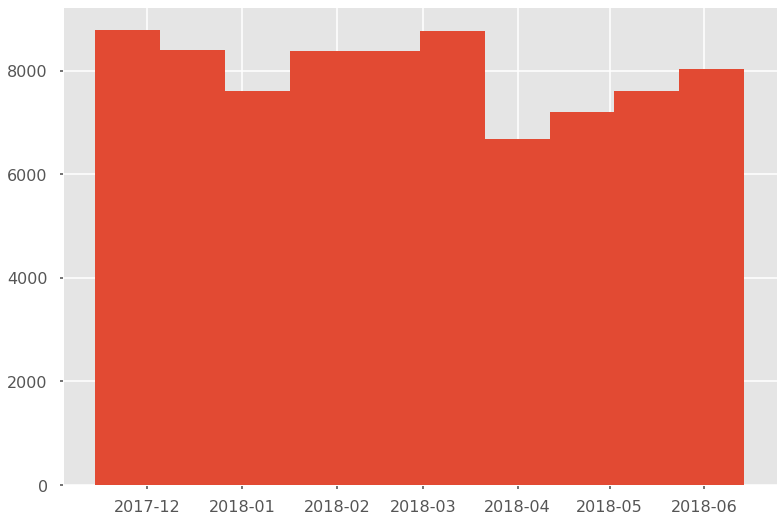

In [52]:
data.trending_date.hist()

Dane pochodzƒÖ z okresu od listopada 2017 roku do czerwca 2018 roku i sƒÖ roz≈Ço≈ºone r√≥wnomiernie.

### title

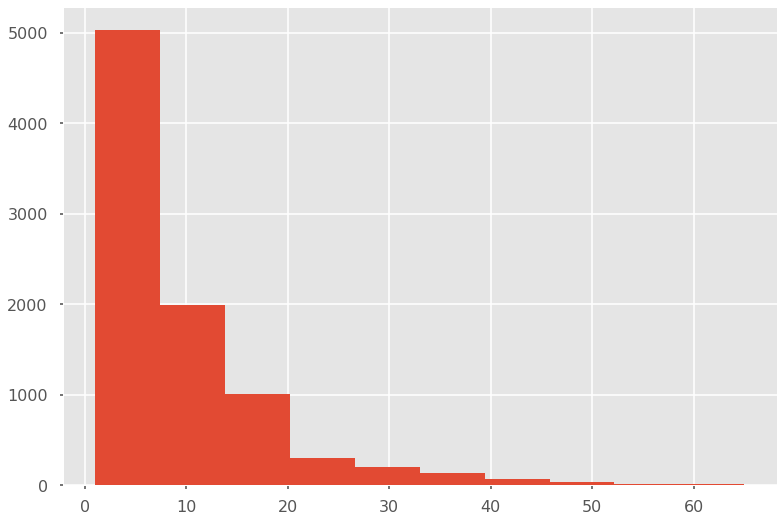

In [53]:
data.title.value_counts()
data.title.value_counts().hist()

Wiƒôkszo≈õƒá film√≥w by≈Ça na li≈õcie Trending raz lub kilka razy, natomiast zdarza≈Çy siƒô r√≥wnie≈º takie, kt√≥re utrzymywa≈Çy siƒô przez d≈Çugi okres czasu.

### Channel title

The Tonight Show Starring Jimmy Fallon    404
TheEllenShow                              400
Jimmy Kimmel Live                         393
Saturday Night Live                       380
Netflix                                   380
Late Night with Seth Meyers               377
The Late Show with Stephen Colbert        376
The Late Late Show with James Corden      365
WWE                                       361
ESPN                                      334
Warner Bros. Pictures                     318
CNN                                       305
WIRED                                     305
Screen Junkies                            297
Marvel Entertainment                      273
20th Century Fox                          273
Breakfast Club Power 105.1 FM             251
Vogue                                     251
SMTOWN                                    250
Vox                                       248
Star Wars                                 247
BBC Radio 1                       

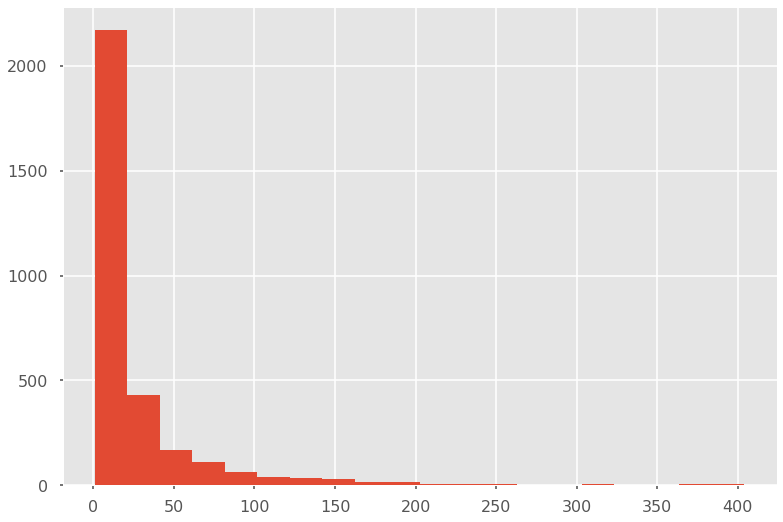

In [54]:
data.channel_title.value_counts().hist(bins=20)
data.channel_title.value_counts()

Niekt√≥re kana≈Çy wystƒôpujƒÖ w danych znacznie czƒô≈õciej ni≈º inne. Jest to spowodowane tym, ≈ºe sƒÖ to kana≈Çy znane globalnie, majƒÖce du≈ºƒÖ ilo≈õƒá subskrybent√≥w. ≈Åatwiej im trafiƒá do wiƒôkszej publiczno≈õci i zdobyƒá wysokƒÖ popularno≈õƒá film√≥w.

### category_id

In [55]:
data.category_id.value_counts(dropna=False)
data.category_id.isnull().sum()*100/len(data)

95.07617520296682

Nazwa kategorii jest pusta dla 95% przypadk√≥w. Jak wiemy z opisu ƒáwiczenia, uzupe≈Çnienie jej bƒôdzie jednym z zada≈Ñ, dlatego na tym etapie pozostaje niezmieniona.

### publish_time

In [56]:
data.publish_time.head()
data.publish_time = pd.to_datetime(data.trending_date)

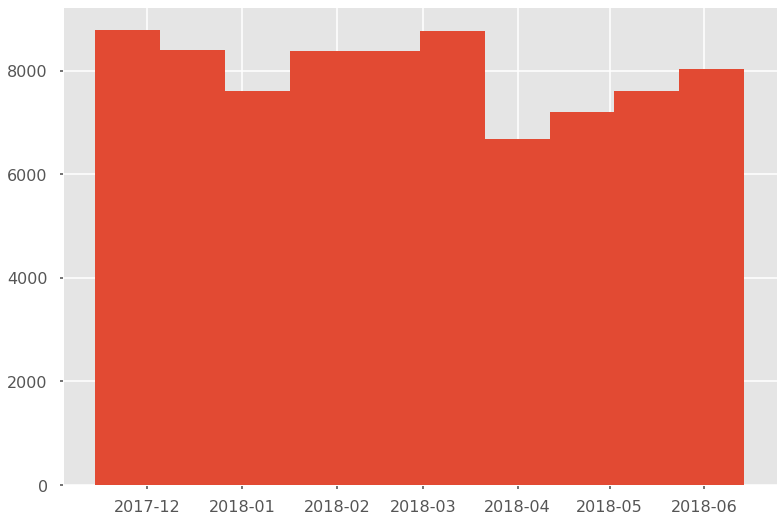

In [57]:
data.publish_time.hist()

### Tags

In [58]:
data.tags.head()

0    christmas|"john lewis christmas"|"john lewis"|...
1    SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...
2    Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...
3    Salford City FC|"Salford City"|"Salford"|"Clas...
4                                               [none]
Name: tags, dtype: object

In [59]:
data.tags.values[0]

'christmas|"john lewis christmas"|"john lewis"|"christmas ad"|"mozthemonster"|"christmas 2017"|"christmas ad 2017"|"john lewis christmas advert"|"moz"'

In [60]:
data.tags.values[0].replace('"',"").split('|')

['christmas',
 'john lewis christmas',
 'john lewis',
 'christmas ad',
 'mozthemonster',
 'christmas 2017',
 'christmas ad 2017',
 'john lewis christmas advert',
 'moz']

In [127]:
def prepare_tags(tags):
    return tags.replace('"', '').split('|') if tags != '[none]' else None

data['tags_split'] = data.tags.apply(prepare_tags)

In [128]:
all_tags = [tags for tags in data.split_tags if tags != None]
all_tags = list(itertools.chain.from_iterable(all_tags))
tags100 = {a: b for a, b in Counter(all_tags).most_common(100)}

In [129]:
wordcloud = WordCloud(background_color='white',
                      max_words=50, 
                      max_font_size=40,
                      random_state=42).generate_from_frequencies(tags100)

Text(0.5, 1.0, 'Most used tags')

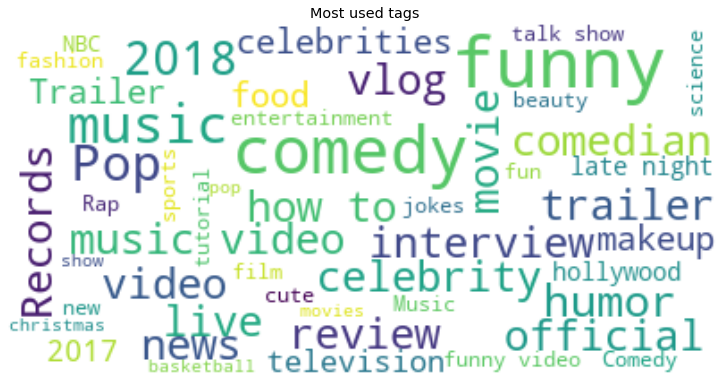

In [130]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.grid(b=None)
plt.axis("off")
plt.title("Most used tags")

Na powy≈ºszej grafice przedstawiono najczƒô≈õciej wystƒôpujƒÖce tagi. Wiƒôkszo≈õƒá z nich zwiƒÖzana jest z rozrywkƒÖ i spƒôdzaniem czasu wolnego.

### Views

In [65]:
data.views.describe()

count    7.981600e+04
mean     4.089589e+06
std      1.439442e+07
min      5.490000e+02
25%      2.462062e+05
50%      7.952275e+05
75%      2.533302e+06
max      4.245389e+08
Name: views, dtype: float64

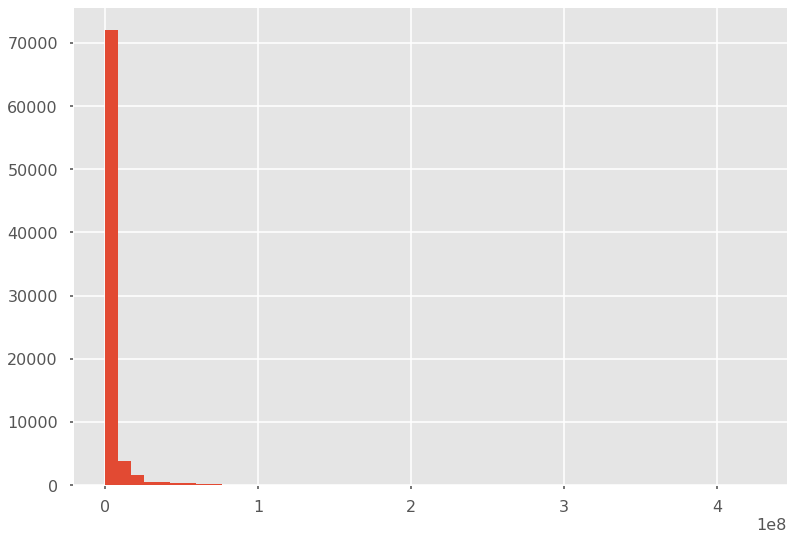

In [66]:
data.views.hist(bins=50)

### Likes

In [67]:
data.likes.describe()

count    7.981600e+04
mean     1.036131e+05
std      2.958002e+05
min      0.000000e+00
25%      5.637750e+03
50%      2.090300e+04
75%      7.816350e+04
max      5.613827e+06
Name: likes, dtype: float64

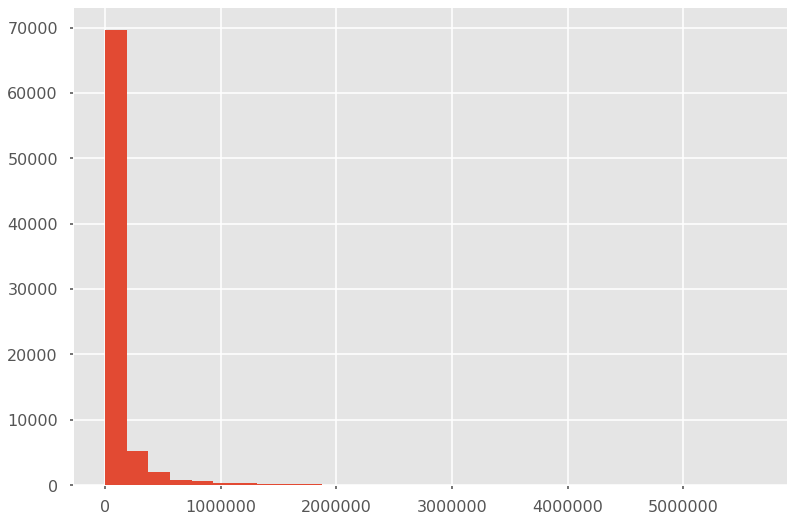

In [68]:
data.likes.hist(bins=30)

### Dislikes

In [69]:
data.dislikes.describe()

count    7.981600e+04
mean     5.612412e+03
std      4.125681e+04
min      0.000000e+00
25%      2.010000e+02
50%      7.110000e+02
75%      2.526000e+03
max      1.944971e+06
Name: dislikes, dtype: float64

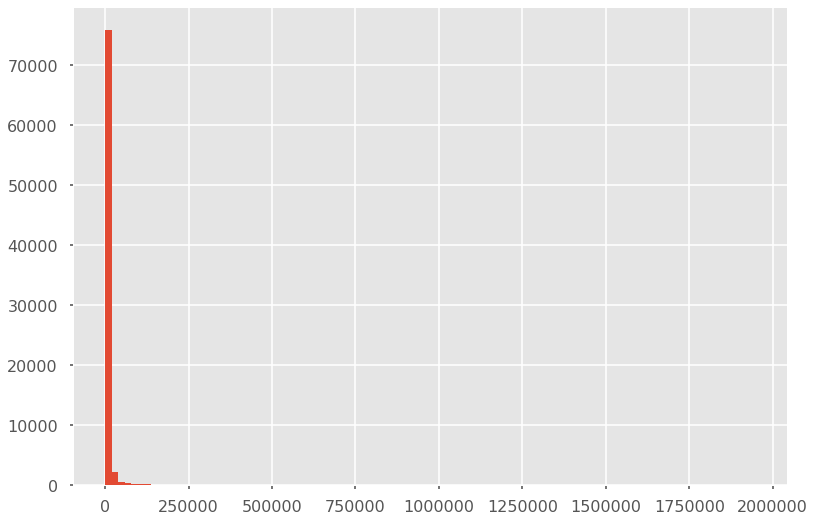

In [70]:
data.dislikes.hist(bins=100)

### Comment count

In [71]:
data.comment_count.describe()

count    7.981600e+04
mean     1.070894e+04
std      4.444967e+04
min      0.000000e+00
25%      6.420000e+02
50%      2.099000e+03
75%      7.215000e+03
max      1.626501e+06
Name: comment_count, dtype: float64

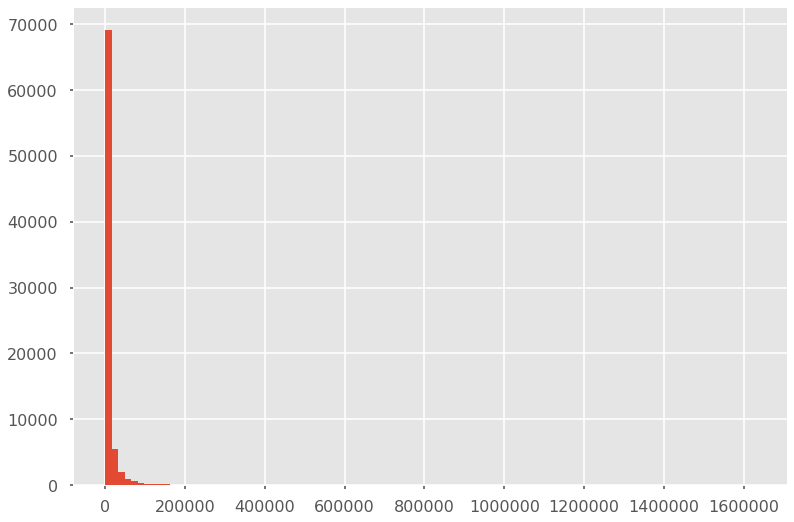

In [72]:
data.comment_count.hist(bins=100)

Liczba wy≈õwietle≈Ñ, poozytywnych i negatywnych reakcji a tak≈ºe liczba komentarzy majƒÖ rozk≈Çad prawosko≈õny - w danych wystƒôpuje ma≈Ça liczba film√≥w o rekordowej oglƒÖdalno≈õci, wzbudzajƒÖcych bardzo du≈ºo pozytywnych i negatywnych reakcji i komentarzy. Wiƒôkszo≈õƒá film√≥w jest do siebie zbli≈ºona z globalnego punktu widzenia.

### Thumbnail_link

In [73]:
data.thumbnail_link.head()

0    https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg
1    https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg
2    https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg
3    https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg
4    https://i.ytimg.com/vi/rHwDegptbI4/default.jpg
Name: thumbnail_link, dtype: object

Wszystkie linki majƒÖ podobnƒÖ strukturƒô: r√≥≈ºniƒÖ siƒô jedynie cz≈Çonem stanowiƒÖcym identyfikator filmu.

### comments_disabled

In [74]:
data.comments_disabled.value_counts()

False    78501
True      1315
Name: comments_disabled, dtype: int64

Filmy z wy≈ÇƒÖczonƒÖ mo≈ºliwo≈õciƒÖ komentowania stanowiƒÖ jedynie 1,65% ca≈Çego zbioru danych. W dalszej czƒô≈õci projektu ciekawym zagadnieniem mo≈ºe okazaƒá siƒô analiza tych film√≥w - jakie by≈Çy prawdopodobne powody wy≈ÇƒÖczenia komentarzy oraz jednoczesna wysoka popularno≈õƒá - mo≈ºe by≈Çy to komunikaty rzƒÖdowe, kontrowersyjne tre≈õci, a mo≈ºe jeszcze inne? 

### Rating disabled

In [75]:
data.ratings_disabled.value_counts()

False    79376
True       440
Name: ratings_disabled, dtype: int64

Filmy z wy≈ÇƒÖczonƒÖ mo≈ºliwo≈õciƒÖ oceniania stanowiƒÖ 0,55% ca≈Çego zbioru danych. Jak wy≈ºej, analiza powod√≥w takiej decyzji mo≈ºe byƒá interesujƒÖcym zagadnieniem.

### video_error_or_removed 

In [76]:
data.video_error_or_removed.value_counts()

False    79724
True        92
Name: video_error_or_removed, dtype: int64

Filmy usuniƒôte lub powodujƒÖce b≈Çƒôdy stanowiƒÖ 0,12% ca≈Çego zbioru danych. Byƒá mo≈ºe niekt√≥re z nich zdoby≈Çy popularno≈õƒá ze wzglƒôdu wysokiej kontrowersyjno≈õci i zosta≈Çy z tego samego powodu usuniƒôte? Mo≈ºe ≈Çama≈Çy prawa autorskie? Przyjrzymy siƒô im w kolejnym etapie analizy.

**Can we remove those ones? --- jak bƒôdzie nam siƒô chcia≈Ço to ja bym z ciekwo≈õci poszuka≈Ça co to sƒÖ za filmy i dlaczego mog≈Çy zostaƒá usuniƒôte ---> Byƒá mo≈ºe wnioskiem z ca≈Çej analizy bƒôdzie "Wrzuƒá na Jutuba film, kt√≥ry bƒôdzie obra≈ºa≈Ç wszystkich, byc mo≈ºe uda ci siƒô byƒá w trending zanim kto≈õ w YT siƒô ogarnie" XD Zrobi≈Çabym sprawdzenie korelacji z liczbƒÖ dislikes.**

### description

In [77]:
data.columns = data.columns.str.replace('description ', 'description')

In [78]:
data.description.values[0]

"Click here to continue the story and make your own monster:\\nhttp://bit.ly/2mboXgj\\n\\nJoe befriends a noisy Monster under his bed but the two have so much fun together that he can't get to sleep, leaving him tired by day. For Christmas Joe receives a gift to help him finally get a good night‚Äôs sleep.\\n\\nShop the ad\\nhttp://bit.ly/2hg04Lc\\n\\nThe music is Golden Slumbers performed by elbow, the original song was by The Beatles. \\nFind the track:\\nhttps://Elbow.lnk.to/GoldenSlumbersXS\\n\\nSubscribe to this channel for regular video updates\\nhttp://bit.ly/2eU8MvW\\n\\nIf you want to hear more from John Lewis:\\n\\nLike John Lewis on Facebook\\nhttp://www.facebook.com/johnlewisretail\\n\\nFollow John Lewis on Twitter\\nhttp://twitter.com/johnlewisretail\\n\\nFollow John Lewis on Instagram\\nhttp://instagram.com/johnlewisretail"

## Wytworzenie atrybut√≥w do predykcji

Dostƒôpne atrybuty sƒÖ mniej lub bardziej informatywne dla postawionego problemu. Na przyk≈Çad mo≈ºna zastanowiƒá siƒô, czy liczba pozytywnych reakcji sprzyja wy≈ºszej oglƒÖdalno≈õci, jednak nie jest to czynnik, kt√≥ry autor filmu ma pod kontrolƒÖ. Niekt√≥re z artybut√≥w mo≈ºna poddaƒá dodatkowym operacjom majƒÖcym na celu ekstrakcjƒô cech, kt√≥re bƒôdƒÖ przydatne w procesie odkrywania wiedzy. Do takich atrybut√≥w nale≈ºƒÖ na pewno: `title`, `tags`, `description`. Atrybuty takie jak: `comments_disabled`, `ratings_disabled`, `comment_count`, `video_error_or_removed`, `dislikes`, `publish_time` mogƒÖ czƒô≈õciowo wchodziƒá w korelacje z innymi atrybutami (np. mo≈ºna spodziewaƒá siƒô, ≈ºe w okresie ≈õwiƒÖtecznym w tagach bƒôdzie przewa≈ºa≈Ço s≈Çowo "christmas", flaga `video_error_or_removed` mo≈ºe byƒá w zale≈ºno≈õci z liczbƒÖ negatywnych reakcji itp.). Atrybutami, kt√≥rych nie bƒôdziemy analizowaƒá w tej czƒô≈õci sƒÖ: `video_id` - ze wzglƒôdu na to, ≈ºe jest to unikalny identyfikator filmu, `views` - niemo≈ºno≈õƒá bezpo≈õredniego wp≈Çywu, `category_id` - brak danych z wiadomych przyczyn.

Odno≈õnie dalszych dzia≈Ça≈Ñ to bym to widzia≈Ça tak:
- Dla ka≈ºdego z {title, tags, description}:
   
    - tokenizacja
    - usuniƒôcie stopwords
    - (lematyzacja/stemming)
    - wytworzenie reprezentacji word2vec, tfidf, embeddings (nwm czy wszystkie, mo≈ºe tylko niekt√≥re/jeden z nich albo inne)
    - ? mo≈ºe wytworzenie jakiego≈õ/jakich≈õ binarnych atrybut√≥w m√≥wiƒÖcych o tym, czy posiada s≈Çowa, kt√≥re w danym czasie by≈Çy najbardziej "na czasie" - tzn. na przyk≈Çad w lipcu mamy, ≈ºe najczƒô≈õciej pojawiajƒÖ siƒô "science, independence, cat" i atrybut mia≈Çby True, je≈õli dla tego filmu te≈º wystƒôpujƒô jedno z nich np. "science"  **Bardzo podoba mi siƒô pomys≈Ç**
    - procentowa zawarto≈õƒá capital letters
    - obecno≈õƒá znak√≥w typu emotikony, wykrzykniki, znaki zapytania itp.
    - d≈Çugo≈õƒá ca≈Çego tekstu
    
    
- sprawdzenie prawdopodobnych korelacji, o kt√≥rych pisa≈Çam wy≈ºej
- R√≥wnolegle dobrze by by≈Ço ogarnƒÖƒá YouTube API i zaczƒÖƒá ≈õciƒÖgaƒá dane potrzebne do punktu 5

Propozycje atrybut√≥w tekstowych:,
 * Czy wystƒôpuje link / ilo≈õƒá link√≥w,
 * Czy opis zawiera tagi / ilo≈õƒá tag√≥w zawartych w opisie,
 * Ilo≈õƒá tag√≥w,    
 * Czy zawarty jest link do FB / Instagrama / SnapChata / Twittera... (lub czy w og√≥le do jakich≈õ medi√≥w spo≈Çeczno≈õciowych),
 * D≈Çugo≈õƒá opisu,
 * NLP - Proponujƒô u≈ºyƒá Tf-Idf by mieƒá punkt wyj≈õcia i jednej DLowej metody - ELMO lub BERT (ja mam do≈õwiadczenie z ELMO),
 
Atrybuty pozatekstowe:
  * Czy opublikowane w weekend,
  * Godzina publikacji (kodowanie atrybutu - ciekawy temat),
  * Czy jest muzykƒÖ? (pytanie jak sprawdziƒá?),
  * Czy komentarze wy≈ÇƒÖczone,
  * Czy rating wy≈ÇƒÖczony

In [132]:
def length(wordlist):
    if wordlist is None: return 0
    else: return len(wordlist)
def onlyalpha(string):
    return word_tokenize(''.join([char for char in string if char.isalpha() or char.isspace()]))
def count_capitals(alphalist):
    string = ''.join(alphalist)
    if len(string) == 0:
        return 0
    else: return len([char for char in string if char.isupper()])/ len(string)

In [133]:
data['title_split'] = data.title.apply(word_tokenize)
data['title_alpha'] = data.title.apply(onlyalpha)
data['title_num_words'] = data.title_alpha.apply(length)
data['title_capital'] = data.title_alpha.apply(count_capitals)
data['title_exc_count'] = data.apply(lambda row: row['title'].count('!'), axis=1)
data['title_que_count'] = data.apply(lambda row: row['title'].count('?'), axis=1)

In [134]:
data[['video_id','title_split', 'title_alpha', 'title_num_words', 'title_capital', 'title_exc_count', 'title_que_count']]

video_id                                        title_split  \
0      Jw1Y-zhQURU  [John, Lewis, Christmas, Ad, 2017, -, #, MozTh...   
1      3s1rvMFUweQ  [Taylor, Swift, :, ‚Ä¶Ready, for, It, ?, (, Live...   
2      n1WpP7iowLc  [Eminem, -, Walk, On, Water, (, Audio, ), ft.,...   
3      PUTEiSjKwJU  [Goals, from, Salford, City, vs, Class, of, 92...   
4      rHwDegptbI4  [Dashcam, captures, truck, 's, near, miss, wit...   
5      AumaWl0TNBo                [How, My, Relationship, Started, !]   
6      2Vv-BfVoq4g  [Ed, Sheeran, -, Perfect, (, Official, Music, ...   
7      -N5eucPMTTc               [CHRISTMAS, HAS, GONE, TO, MY, HEAD]   
8      LMCuKltaY3M  [Elbow, -, Golden, Slumbers, (, John, Lewis, A...   
9      9t9u_yPEidY  [Jennifer, Lopez, -, Amor, ,, Amor, ,, Amor, (...   
10     ONQ-fAp5X64  [CAN, BABIES, DO, GYMNASTICS, ?, **World, Reco...   
11     Dlwf5u2BLAg  [TV, Reporter, Interviews, Alleged, Bank, Robb...   
12     NVCqz2BDfcQ  [Gucci, Mane, -, Curve, (, ft, ., The, Weeknd, )]   
13     MyEqfBkzESU             [EXTREME, GOLDEN, TAN, TRANSFORMATION]   
14     b4vTZx_AtHk          [How, To, Dry, a, Shirt, in, 30, Seconds]   
15     BsfhHKx6ajA  [Attracting, An, Alpaca, With, An, Accordion, ...   
16     DIU3xPdhCBI  [Sam, Smith, surprises, brides, at, their, wed...   
17     pz95u3UVpaM  [Camila, Cabello, -, Havana, (, Vertical, Vide...   
18     jp9hK-jY6yY  [When, Someone, Has, A, Crush, on, You, |, Lil...   
19     gEHCXl4J9Qo  [Taylor, Swift, -, ‚Äú, New, Year, ‚Äô, s, Day, ‚Äù,...   
20     OWvCCu2t6Ts  [SO, Much, To, Tell, You, |, 32, Weeks, Pregna...   
21     6p-QzY5bxJ0  [The, 'Stranger, Things, ', Kids, Were, Nearly...   
22     fiusxyygqGk  [Marshmello, -, You, &, Me, (, Official, Music...   
23     QOksZ8VogRw  [Bastille, -, World, Gone, Mad, (, from, Brigh...   
24     lo5ERI5nPbM  [Sharon, Needles, -, Andy, Warhol, Is, Dead, [...   
25     Ja_GMU7-sjs      [Google, Pixelbook, :, $, 1000, of, Weird, !]   
26     _6ViZ13mN9I  [GSP, and, Tyron, Woodley, Talk, About, Their,...   
27     F62QpaPWXDI            [THE, CHEAPEST, &, BEST, EYESHADOWS, ?]   
28     g5c1bk8weaQ  [FIRST, TIME, IM, DOING, THIS, !, TALKS, WITH,...   
29     3qYt_fXdaXY  [Sweetie, destroys, Flav, (, Sweetie, vs, ., F...   
...            ...                                                ...   
40919  vDyYMcjf500  [The, History, of, Fortnite, Battle, Royale, -...   
40920  3Q2j5ApzSqs  [Christina, Aguilera, -, Fall, In, Line, (, Of...   
40921  GfxNGjfSKRY  [James, Bay, -, Delicate, (, Taylor, Swift, co...   
40922  amtC28yfYCM  [Mindy, Kaling, Is, Mad, She, Was, n't, Invite...   
40923  9NC2saE5MbQ              [Camels, vs, ., Cactus, !, !, !, ÿ¨ŸÖŸÑ]   
40924  XdNOI-q70q4  [GIANT, Bowl, of, Lucky, Charms, CHALLENGE, (,...   
40925  QgOXIEhHU1Y  [Diplo, ,, French, Montana, &, Lil, Pump, ft.,...   
40926  SQsPvrev_bQ                                              [435]   
40927  _1LdMWlNYS4  [That, Time, It, Rained, for, Two, Million, Ye...   
40928  AFbu21AGSho  [Watch, a, Hercules, Beetle, Metamorphose, Bef...   
40929  hHaUQh6Gx-Q             [Mustard, ,, Nick, Jonas, -, Anywhere]   
40930  wI89nVn6LHk  [Maddie, Poppe, Wins, American, Idol, 2018, -,...   
40931  oLDbO545aKQ  [Terrible, Magicians, |, Rudy, Mancuso, &, Jua...   
40932  tiF9SzzzX_o  [The, Voice, 2018, Brynn, Cartelli, -, Finale,...   
40933  Gs26bZTRkdU  [8, Survival, Myths, That, Will, Definitely, M...   
40934  Qcj15vHJTtk                           [Royal, Wedding, -, SNL]   
40935  2in8XqiElwc  [Nicki, Minaj, -, Chun-Li, (, Live, on, SNL, /...   
40936  Xr2rgT9uEnA     [LIE, DETECTOR, TEST, WITH, MY, GIRLFRIEND, !]   
40937  v7H_Or9Nr5I             [Lucas, the, Spider, -, Giant, Spider]   
40938  n_W54baizX8    [Daddy, Yankee, -, Hielo, (, Video, Oficial, )]   
40939  pcJo0tIWybY  [SZA, -, Garden, (, Say, It, Like, Dat, ), (, ...   
40940  _QWZvU7VCn8  [Brad, Pitt, Bid, $, 120k, For, A, Night, With...   
40941  7UoP9ABJXGE  [Dan, +, Shay, -, Speechless, (, Wedd

In [135]:
data['tags_count'] = data.tags_split.apply(length)

In [139]:
data[['video_id','tags','tags_split', 'tags_count']].head(8)

video_id                                               tags  \
0  Jw1Y-zhQURU  christmas|"john lewis christmas"|"john lewis"|...   
1  3s1rvMFUweQ  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   
2  n1WpP7iowLc  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...   
3  PUTEiSjKwJU  Salford City FC|"Salford City"|"Salford"|"Clas...   
4  rHwDegptbI4                                             [none]   
5  AumaWl0TNBo  pointlessblog|"pointlessblogtv"|"pointlessblog...   
6  2Vv-BfVoq4g  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...   
7  -N5eucPMTTc  zoe sugg|"zoella"|"zoe"|"vlog"|"vlogging"|"vlo...   

                                          tags_split  tags_count  
0  [christmas, john lewis christmas, john lewis, ...           9  
1  [SNL, Saturday Night Live, SNL Season 43, Epis...          36  
2  [Eminem, Walk, On, Water, Aftermath/Shady/Inte...           6  
3  [Salford City FC, Salford City, Salford, Class...           9  
4                                               None           0  
5  [pointlessblog, pointlessblogtv, pointlessblog...          38  
6  [edsheeran, ed sheeran, acoustic, live, cover,...          10  
7  [zoe sugg, zoella, zoe, vlog, vlogging, vlogs,...          31

In [141]:
data['description']

0        Click here to continue the story and make your...
1        Musical guest Taylor Swift performs ‚Ä¶Ready for...
2        Eminem's new track Walk on Water ft. Beyonc√© i...
3        Salford drew 4-4 against the Class of 92 and F...
4        Dashcam captures truck's near miss with child ...
5        ‚ñ∫ HOW MY RELATIONSHIP STARTED!\n‚ñ∫ PB Merch ‚Ä¢ h...
6        üéß: https://ad.gt/yt-perfect\nüí∞: https://atlant...
7        CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...
8        ‚ÄúGolden Slumbers‚Äù, originally by The Beatles, ...
9        Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O...
10       ‚û¢ Join my FREE 7 Steps to Success - http://www...
11       More from Inside Edition: https://www.youtube....
12       Gucci Mane - Curve feat. The Weeknd\n\n Mr. Da...
13       -\n\n\nWebsite - http://www.johnmaclean.co.uk\...
14       Today I show you how to completely dry a shirt...
15       Trust us, there's nowhere else in the universe...
16       You have to watch this! Sa

In [145]:
def tokenize(column):
    if column is None:
        return []
    else: return word_tokenize(column)

In [ ]:
data['desc_split'] = data.description.apply(tokenize)
data['desc_alpha'] = data.description.apply(onlyalpha)
data['desc_num_words'] = data.desc_alpha.apply(length)
data['desc_capital'] = data.title_alpha.apply(count_capitals)
data['desc_exc_count'] = data.apply(lambda row: row['description'].count('!'), axis=1)
data['desc_que_count'] = data.apply(lambda row: row['description'].count('?'), axis=1)